# Time Series in Python

We install packages we are going to use

In [1]:
pip install quandl

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cryptocompare

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


We are importing the packages we are going to use 

In [4]:
import cryptocompare
import datetime
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt


We get the API key from cryptocompare and retrive historical data from Etherium

In [5]:
cryptocompare.cryptocompare._set_api_key_parameter('49a839b5b7395a830c0a3a61819d8a657950ef22ae68d5e6c1364ccc60117584')

'&api_key=49a839b5b7395a830c0a3a61819d8a657950ef22ae68d5e6c1364ccc60117584'

In [6]:

ETHy = cryptocompare.get_historical_price_day('ETH', 'EUR', limit=24, exchange='CCCAGG', toTs=datetime.datetime(2019,6,6))

In [7]:
ETHy

[{'time': 1557619200,
  'high': 168.95,
  'low': 162.5,
  'open': 170.15,
  'volumefrom': 5653948.51,
  'volumeto': 946132985.27,
  'close': 167.34,
  'conversionType': 'multiply',
  'conversionSymbol': 'BTC'},
 {'time': 1557705600,
  'high': 189.09,
  'low': 171.51,
  'open': 167.34,
  'volumefrom': 5400982.7,
  'volumeto': 942475205.13,
  'close': 174.5,
  'conversionType': 'multiply',
  'conversionSymbol': 'BTC'},
 {'time': 1557792000,
  'high': 197.88,
  'low': 177.06,
  'open': 174.5,
  'volumefrom': 6092824.59,
  'volumeto': 1182607719.48,
  'close': 194.1,
  'conversionType': 'multiply',
  'conversionSymbol': 'BTC'},
 {'time': 1557878400,
  'high': 223.82,
  'low': 198.65,
  'open': 194.1,
  'volumefrom': 6575907.22,
  'volumeto': 1461687523.71,
  'close': 222.28,
  'conversionType': 'multiply',
  'conversionSymbol': 'BTC'},
 {'time': 1557964800,
  'high': 244.76,
  'low': 213.79,
  'open': 222.28,
  'volumefrom': 7377066.74,
  'volumeto': 1748374378.06,
  'close': 237,
  'conve

We get the API key from cryptocompare and retrive historical data from Bitcoin

In [8]:
quandl.ApiConfig.api_key = "B8Vrxz-sqXP1XcvsMAXs"

In [9]:
mydata2 =  quandl.get("BCHAIN/MKPRU", start_date="2019-5-13", end_date="2019-6-6")


In [10]:
mydata2

,Value
Date,
2019-05-13,6978.63
2019-05-14,7823.11
2019-05-15,7992.69
2019-05-16,8206.90
2019-05-17,7885.96
2019-05-18,7362.22
2019-05-19,7265.05
2019-05-20,8193.70
2019-05-21,8007.03


We make pick the closing price out from the etherium data

In [11]:
ETH = pd.DataFrame(ETHy)

In [12]:
Ether = pd.DataFrame(ETH, columns = ["close"])

In [13]:
Ether

,close
0,167.34
1,174.50
2,194.10
3,222.28
4,237.00
5,219.33
6,210.82
7,233.78
8,226.34
9,228.62


We make the into a list

In [14]:
yt = Ether.values.tolist()
xt = mydata2.values.tolist()

We get the OLS values 

In [15]:
beta = ((np.multiply(yt,xt)).mean()-np.mean(xt)*np.mean(yt))/((np.multiply(xt, xt)).mean()-np.mean(xt)*np.mean(xt))

In [16]:
alpha = np.mean(yt)-beta*np.mean(xt)

In [17]:
print(alpha, beta)

-21.855999258132584 0.030329245120665625


We are creating arrys

In [18]:
y_hat = alpha + np.multiply(beta,xt)
L = np.sum(np.multiply(yt-y_hat, yt - y_hat))
L

4105.630068072647

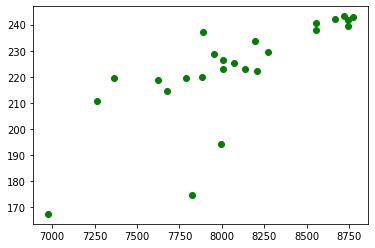

In [19]:
plt.plot(xt,yt, 'go')

MSE

In [20]:
def cal_cost(alpha,beta,xt,yt):
    n = len(yt)
    predictions = alpha + np.multiply(beta, xt)
    cost = (1/2*n)*np.sum(np.sum(np.square(predictions-yt)))
    return cost

In [21]:
cal_cost(alpha,beta,xt,yt)

51320.37585090809

Gradient Descent

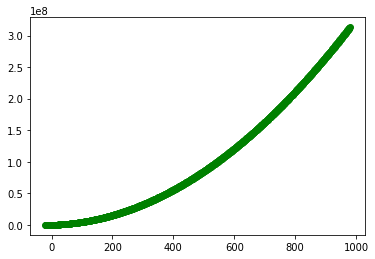

In [22]:
iterations = 1000
alpha = -21

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    alpha = alpha +1
    
    loss_history[i] = cal_cost(alpha,beta,xt,yt)
    alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

In [23]:
xt = xt/(np.max(xt))

In [24]:
iterations = 500
learningrate = 0.01
alpha = -21
beta = 265.98
n = len(yt)
index = np.arange(1, iterations+1, 1).reshape((iterations, 1))

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))
beta_history = np.zeros((iterations,1))

for i in range(iterations):
       
        prediction = alpha + np.multiply(beta,xt)
        residuals = yt-prediction
        residuals_sum = sum(residuals)
        alpha_gradient = -(1/n)*residuals_sum*(learningrate)
        alpha = alpha - alpha_gradient
        alpha_history[i] = alpha
    
        residuals_x = np.multiply(residuals,xt)
        residuals_x_sum = sum(residuals_x)
        beta_gradient = -(1/n)*residuals_x_sum*(learningrate)
        beta = beta - beta_gradient
        beta_history[i] = beta
    
        loss_history[i] = cal_cost(alpha,beta,xt,yt)

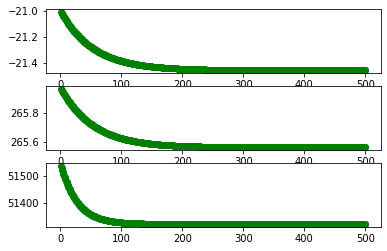

In [25]:
plt.subplot(311)
plt.plot(index, alpha_history,'go')
plt.subplot(312)
plt.plot(index, beta_history,'go')
plt.subplot(313)
plt.plot(index, loss_history,'go')

In [26]:
cal_cost(alpha,beta,xt,yt)

51320.54424401061